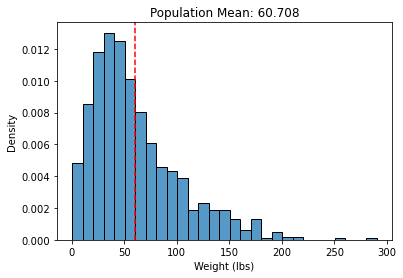

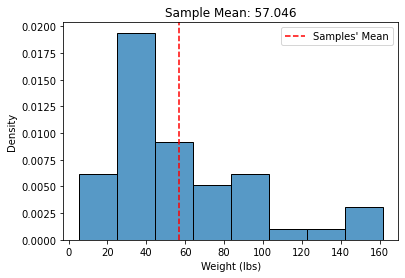

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#(
# If we want to know information about a large population we can use measurements
# from a sample to better understand the population 
# The key bits of information are the sample size (the law of big numbers is very relevant)
# If we don't have an appropriate sample size then our observed measurements aren't relevant
# )

df = pd.read_csv('salmon.csv')

pop_weight=df['Salmon_Weight']
mean_weight = np.round(np.mean(pop_weight), 3)

sns.histplot(pop_weight, stat='density')
plt.axvline(mean_weight, color='r', linestyle='dashed')
plt.title(f'Population Mean: {mean_weight}')
plt.xlabel('Weight (lbs)')
plt.show()
plt.clf()

sample_size = 50

sample = np.random.choice(np.array(pop_weight), sample_size, replace=False)
sample_mean = round(np.mean(sample), 3)

sns.histplot(sample, stat='density')
plt.axvline(sample_mean, color='r', linestyle='dashed', label='Samples\' Mean')
plt.title(f'Sample Mean: {sample_mean}')
plt.xlabel('Weight (lbs)')
plt.legend()
plt.show()

#(
# This example shows us findning the mean from a sample and comparing it to the mean from a the population
# as you increase the sample size the more accurate the sample mean is in relation to thep pop mean
# )

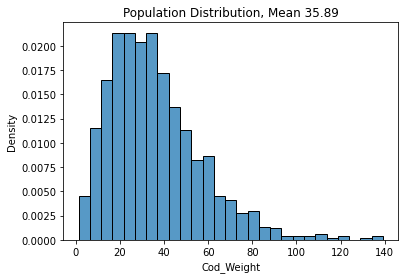

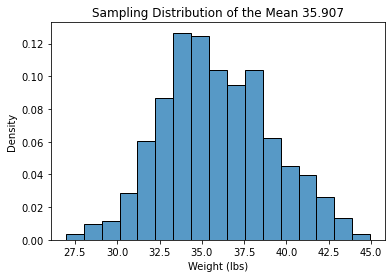

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

population = pd.read_csv('cod_population.csv')
weight = population['Cod_Weight']

sns.histplot(weight, stat='density')
plt.title(f'Population Distribution, Mean {np.round(np.mean(weight), 2)}')
plt.show()

sample_size = 40
sample_means = []

for index in range(500):
    sample = np.random.choice(weight, sample_size, replace=False)
    this_mean = np.mean(sample)
    sample_means.append(this_mean)

sns.histplot(sample_means, stat='density')
plt.title(f'Sampling Distribution of the Mean {np.round(np.mean(sample_means), 3)}')
plt.xlabel('Weight (lbs)')
plt.show()

#(
# So here we are just finding the mean from the population and then just just taking samples
# from the population then finding the mean of the samples and compare that to the mean
# 
# In the np.random.choice we use replace=False so we don't put back the same ones we 
# 
# )

0.23789245315235102 0.24029405443243884 hi


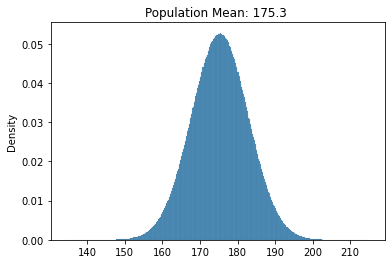

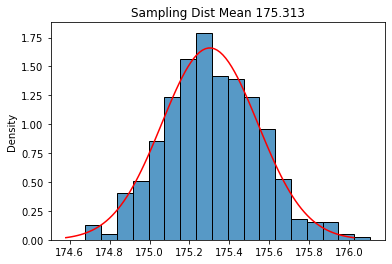

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

population_mean = 175.3
population_std_dev = 7.6
sample_size = 1000

population = np.random.normal(population_mean, population_std_dev, size = 10000000)

#(The python module np lets us create sample data by giving: mean, std_dev and total pop size
# )

sample_means = []
for x in range(500):
    sample = np.random.choice(population, sample_size, replace=False)
    this_mean = np.mean(sample)
    sample_means.append(this_mean)

mean_sampling_dist = round(np.mean(sample_means), 3)
print(np.std(sample_means), np.std(population)/sample_size**0.5, 'hi')
#(Here very simple just getting random samples and then finding mean and then mean of that
# so mean of each sample and then the mean of all those sample means
# )

sns.histplot(population, stat='density')
plt.title(f'Population Mean: {population_mean} ')
plt.xlabel('')
plt.show()
plt.clf()
#^^ Here we are just putting the population on a graph

mu = np.mean(population)
sigma = np.std(population)/sample_size**0.5
#(
# The simplification for the derivation of this equation is that the the equation for the variance 
# sample means is 1/n^2 * nSigma^2 
# This then simplifies to nSigma^2/n => sigma^2/n
# and the standard deviation is the sqrt(variance) so thats why we get sigma/sqrt(n) when we square
# the variance of sigma^2/n
# )

x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
#(linspace just makes an evenly spread array of floats in a range
# Here we are going 3 standard errors less and 3standard errors more than mean cos that is where
# all our data will be
# Note that the standard error of the population is the same as the standard deviation
# of the sample
# )

sns.histplot(sample_means, stat='density')
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='r', label='normal PDF')
#(This is the normaul distribution curve its like an overlay
# the pdf (probability density) will take a range (x - the linspace) a mean  
# and a std_dev and show the regular bell curve of values to expect for this
# data - and so putting it on top of the seaborn density data it allows us to 
# to see how normal the data is 
# )
plt.title(f'Sampling Dist Mean {mean_sampling_dist}')
plt.xlabel('')
plt.show()

#(
# So this example introduces the theory of the Central Limit Theorem (CLT)
# The CLT has two major logics
# 
# The first is that a sample mean (of n size) from the population that has a mean of (u)
# 
# Given that n is sufficiently large (n > 30) - the sampling dist of the means can be said
# to be normally distributed if: the mean of the samples (x) is approx equal to the population
# mean (so x =~= u)
# 
# 
# The second belief of the CLT is that the sampling distribution's standard dev should be
# population deviation (o) / square_root(n)
# so the population_dev/sample_size ** 0.5
# 
# 
# )

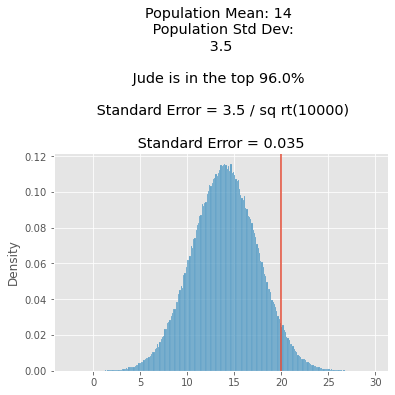

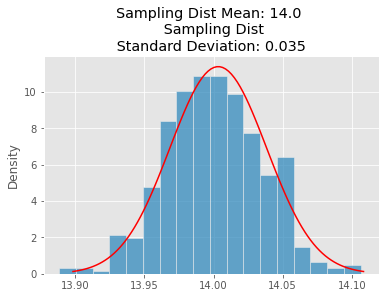

Max: 14.106272935495069. Min: 13.88838540524552


In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.stats as stats
import seaborn as sns

#Standard Error
#(
# The sampling distribution is described as normally distributed if the std_dev of the
# sampling means is the same as the population standard deviation/sqrt(sample_size)
# so sample_dist_std_dev === pop_std_dev/sqrt(sample_size)
# )
#The std dev of the sampling dist is also know as the std error of the estimate of the mean

#(
# As we don't often know the std_dev of the population we can estimate the std_err by doing
# std_dev of sample / sqrt(sample_size)
# )

population_mean = 14
population_std_dev = 3.5
sample_size = 10000
height = 20

population = np.random.normal(population_mean, population_std_dev, size=366000)

sample_means = []
for x in range(500):
    sample = np.random.choice(population, sample_size, replace= False)
    sample_means.append(np.mean(sample))

mean_sampling_dist = round(np.mean(sample_means), 3)
std_sampling_dist = round(np.std(sample_means), 3)
std_error = population_std_dev / (sample_size ** 0.5)

sns.histplot(population, stat='density')
plt.title(f"""Population Mean: {population_mean} \n Population Std Dev:
 {population_std_dev} \n \n Jude is in the top {round(stats.norm.cdf(height, population_mean, population_std_dev), 2) *100}%  \n\n Standard Error = {population_std_dev} / sq rt({sample_size})
  \n Standard Error = {std_error} """)
plt.axvline(x=height)
plt.show()
plt.close()




sns.histplot(sample_means, stat='density')
mu = np.mean(population)
sigma = np.std(population)/(sample_size**0.5)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='red', label='normal PDF')
plt.title(f"""Sampling Dist Mean: {mean_sampling_dist} \n Sampling Dist
 Standard Deviation: {std_sampling_dist} """)

plt.show()

print(f'Max: {max(sample_means)}. Min: {min(sample_means)}')



#(
 Explanation for the standard error and standard deviation
 
 So as we have seen in the previous examples the standard error of the population is the same as the standard deviation of the sampling means
 We have seen the equation that the std_dev of sampling means is population_std dev / sqrt(sample size)
 
 But WHY!!!!???
 So this is because the sqrt of the variance is the standard deviation (and by that logic the std**2 is the variance)
 
 so we have an array of sample means and we are trying to find the variance of the sample means
 
 so here are some rules about variance - the variance of a * X is a^2 * X where a is a constant
 
 The variance of x1 + x2 + x3 ...Xn is the sum of all the X variances provided all X values have the same mean and standard deviation
 
 )

(
 So we are trying to find the variance of the means
 The means can be expressed as the T/n where n is the number of values and T is the sum of all the values
 
 Division can be expressed as a product by doing the product of the reciprocal of the denom by the numerator
 So 1/n * T is the variance of the mean(sample_means) 
 
 So now our equation for the variance is in the format of a * X so we can do a^2 * x
 so 1/n^2 * T
 
 
 For T we can use the logic that the variance of T is the sum of all the variances within T so the variance of each sample mean
 for every sample mean the variance is sigma^2 (o) squared so it is o + o + o + o for the sum
 So in other words it is sigma^2*n (as it is n amount of sigmas so if n were 7 then we would have 7sigmas^2 or 7*sigma^2)
 
 
 so now the variance for the av(sample_means) === 1/n^2 * nO
 
 So now we can simplify by multiplying the numerator (1/n^2) by nO^2 === nO^2 / n^2
 
 So the n in the numerator will cancel and the denom will become n
 
 so now we have the variance as O^2/n
 
 Now we are done!!!! we have the variance of the av(sample_means)
 
 Now to get the standard_dev of the av(sample_means) we just do the sqrt of the variance
 
 so it is O^2/n === O/sqrt(n)
 
 and this is why we say that the standard_dev of the sample_means === std_dev_population/sqrt(sample_size) :) :) :)
 
 )

Once we know the sampling dist of the mean we can use that to estimate the proobability
of observing a particulaer range of sample means

To do this we use the cumulative distribution function of the normal distribution

Let’s work through this with our salmon fish example. Let’s say we are transporting the salmon and want to make sure the crate we carry the fish in will be strong enough to hold the weight.

Suppose we estimate that the salmon population has an average weight of 60 lbs with a standard deviation of 40 lbs.
- We have a crate that supports 750 lbs, and we want to be able to transport 10 fish at a time.
- We want to calculate the probability that the average weight of those 10 fish is less than or equal to 75 (750/10)


Using the central limit theorem we can estimate that the mean weight of 10 randomly sampled salmon from this population is normally distributed with the mean at 60 and the standard error
of 40/sqrt(10)

We can use these values to plug into our cdf function and look at the probability


In [26]:
import numpy as np
import scipy.stats as stats

x = 75
mean = 60
std = 40
sample_size = 10
st_err = std/(sample_size**0.5)

print(stats.norm.cdf(x, mean, st_err))


0.8821600432854813


So our function told us that there is an 88% chance that our sample of ten fish will be below or equal to 75.

But why was this the case.

The cdf function needs three arguments 
1 - The target value
2 - The average for that data set
3 - the standard deviation

Now although we have put in the standard error as the 3rd argument it is important to note
that the standard error of the population is the standard deviation of the sample means.

And because we want to know how likely it is that our samples could contain values less than or equal to 75 then we need the standard deviation of the sample means

next let's put this on some graphs!

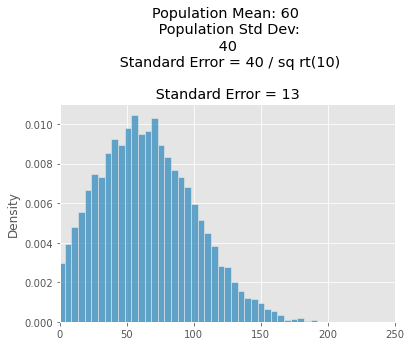

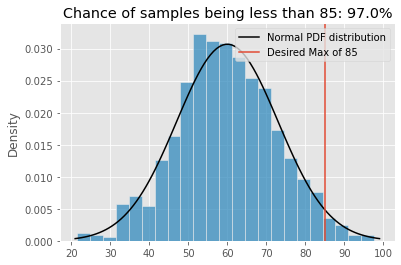

In [55]:
import matplotlib.pyplot as plt
import numpy as py
import scipy.stats as stats
import seaborn as sns

mean = 60
std = 40
sample_size = 10
size = 10000
desired=85
salmon_population = np.random.normal(mean, std, size=size)

sample_means = []

for x in range(1000):
    this_sample = np.random.choice(salmon_population, size=sample_size, replace=False)
    this_mean = np.mean(this_sample)
    sample_means.append(this_mean)
    
mean_samples = round(np.mean(sample_means), 3)
std_samples = round(np.std(sample_means))
std_error = round(std/(sample_size**0.5))

sns.histplot(salmon_population, stat='density')
plt.title(f"""Population Mean: {mean} \n Population Std Dev:
 {std} \n Standard Error = {std} / sq rt({sample_size})
  \n Standard Error = {std_error} """)
plt.xlim(0, 250)
plt.show()
plt.close()

sigma = std_error
mu = mean
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
sns.histplot(sample_means, stat='density')
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='black', label="Normal PDF distribution")
plt.axvline(x=desired, label=f"Desired Max of {desired}")
plt.title(f'Chance of samples being less than {desired}: {round(stats.norm.cdf(desired, mu, sigma), 2)*100}%')
plt.legend()
plt.show()